In [ ]:
# import the dataset.
from google.colab import files
import pandas as pd
import io

# This will prompt you to select the file from your computer
uploaded = files.upload()

# Read the file into a DataFrame
df = pd.read_csv(io.BytesIO(uploaded['teams.csv']))
df.head()

Saving teams.csv to teams.csv


,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


In [ ]:
import pandas as pd
df = df.dropna()

# 3. Perform One-Hot Encoding
# We use pd.get_dummies to convert categorical strings into numbers
df_encoded = pd.get_dummies(df, columns=['team', 'country'])

# 4. Check the new shape of the data
print(f"Original shape: {df.shape}")
print(f"New shape after OHE: {df_encoded.shape}")

# Display the first few columns to see the result
df_encoded.head()

Original shape: (2014, 11)
New shape after OHE: (2014, 453)


,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals,team_AFG,...,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_West Germany,country_Yemen,country_Yugoslavia,country_Zambia,country_Zimbabwe
0,1964,8,8,22.0,161.0,64.2,0,0.0,0.0,True,...,False,False,False,False,False,False,False,False,False,False
1,1968,5,5,23.2,170.2,70.0,0,0.0,0.0,True,...,False,False,False,False,False,False,False,False,False,False
2,1972,8,8,29.0,168.3,63.8,0,0.0,0.0,True,...,False,False,False,False,False,False,False,False,False,False
3,1980,11,11,23.6,168.4,63.2,0,0.0,0.0,True,...,False,False,False,False,False,False,False,False,False,False
4,2004,5,5,18.6,170.8,64.8,0,0.0,0.0,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.preprocessing import StandardScaler

# 1. Define the numerical columns we want to scale
num_cols = ['events', 'athletes', 'age', 'height', 'weight', 'prev_medals', 'prev_3_medals']

# 2. Initialize the StandardScaler
scaler = StandardScaler()

# 3. Apply the scaler to the numerical columns
# Note: We use the encoded dataframe from the previous step (df_encoded)
# or the cleaned dataframe (df) depending on your current variable name.
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# 4. Check the results
print("Numerical columns have been scaled.")
df_encoded[num_cols].head()

Numerical columns have been scaled.


,events,athletes,age,height,weight,prev_medals,prev_3_medals
0,-0.576192,-0.526556,-1.019959,-2.462415,-0.684516,-0.320835,-0.334803
1,-0.636051,-0.549674,-0.584794,-0.713752,0.089552,-0.320835,-0.334803
2,-0.576192,-0.526556,1.518505,-1.074889,-0.737900,-0.320835,-0.334803
3,-0.516334,-0.503438,-0.439739,-1.055881,-0.817976,-0.320835,-0.334803
4,-0.636051,-0.549674,-2.252927,-0.599708,-0.604440,-0.320835,-0.334803


In [ ]:
from sklearn.model_selection import train_test_split

# 1. Define the input features (X) and the target variable (y)
# We drop 'medals' from X because that's what we want to predict
X = df_encoded.drop(columns=['medals'])
y = df_encoded['medals']

# 2. Split the data into training and testing sets
# test_size=0.2 means 20% of the data goes to the test set
# random_state=1 ensures you get the same split every time you run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 3. Print the shapes to confirm
print(f"Total rows in dataset: {len(df_encoded)}")
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")

Total rows in dataset: 2014
Training features shape: (1611, 452)
Testing features shape: (403, 452)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# 1. Initialize the Linear Regression Model
lr_model = LinearRegression()

# 2. Train the model using the training data
lr_model.fit(X_train, y_train)

# 3. Make predictions on the test set
predictions = lr_model.predict(X_test)

# 4. Post-processing: Medals cannot be negative or decimals
# We clip values at 0 and round to the nearest whole number
predictions = np.maximum(predictions, 0).round()

# 5. Evaluate the model
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

# 6. Show a sample of actual vs predicted values
comparison_df = pd.DataFrame({'Actual Medals': y_test, 'Predicted Medals': predictions})
print("\nSample of Predictions:")
print(comparison_df.head(10))

Mean Absolute Error (MAE): 4.53
R-squared (R2) Score: 0.89

Sample of Predictions:
      Actual Medals  Predicted Medals
333               0               0.0
306              13              17.0
976               0               4.0
128               3               4.0
628               2               2.0
119               3               9.0
869               0               4.0
417               0               0.0
1526              0               1.0
1468              0               0.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 1. Initialize the Random Forest Regressor
# n_estimators=100 means the model will use 100 decision trees
rf_model = RandomForestRegressor(n_estimators=100, random_state=1)

# 2. Train the model
rf_model.fit(X_train, y_train)

# 3. Make predictions
rf_predictions = rf_model.predict(X_test)

# 4. Post-processing (rounding and clipping)
rf_predictions = np.maximum(rf_predictions, 0).round()

# 5. Evaluate the model
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
rf_errors = np.abs(y_test - rf_predictions)
rf_threshold_accuracy = (rf_errors <= 5).mean() * 100

print(f"--- Random Forest Performance ---")
print(f"Standard Accuracy (R2 Score): {rf_r2:.2%}")
print(f"Mean Absolute Error: {rf_mae:.2f} medals")
print(f"Accuracy (within 5 medals): {rf_threshold_accuracy:.2f}%")

--- Random Forest Performance ---
Standard Accuracy (R2 Score): 83.90%
Mean Absolute Error: 4.91 medals
Accuracy (within 5 medals): 79.90%


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

MAE: 4.5310173697270475
R2: 0.8911735543708712
Accuracy (±5): 80.39702233250621%


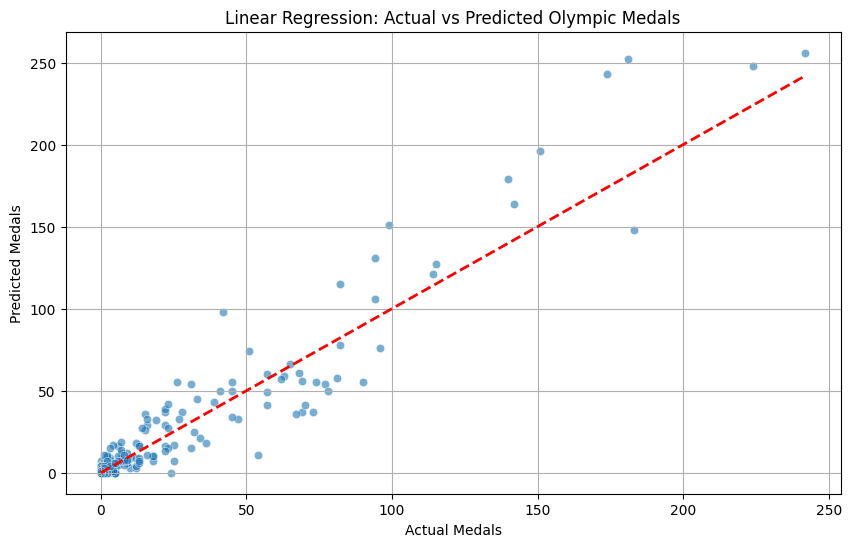

In [ ]:
# 5. Predict and Clean
y_pred = model.predict(X_test)
y_pred = np.maximum(y_pred, 0).round()

# 6. Metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy_5 = (np.abs(y_test - y_pred) <= 5).mean() * 100

print(f"MAE: {mae}")
print(f"R2: {r2}")
print(f"Accuracy (±5): {accuracy_5}%")

# 7. Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')
plt.xlabel('Actual Medals')
plt.ylabel('Predicted Medals')
plt.title('Linear Regression: Actual vs Predicted Olympic Medals')
plt.grid(True)
plt.savefig('lr_performance.png')

Training Accuracy: 92.85%
Testing Accuracy: 89.12%
Training Error (MAE): 3.50
Testing Error (MAE): 4.53


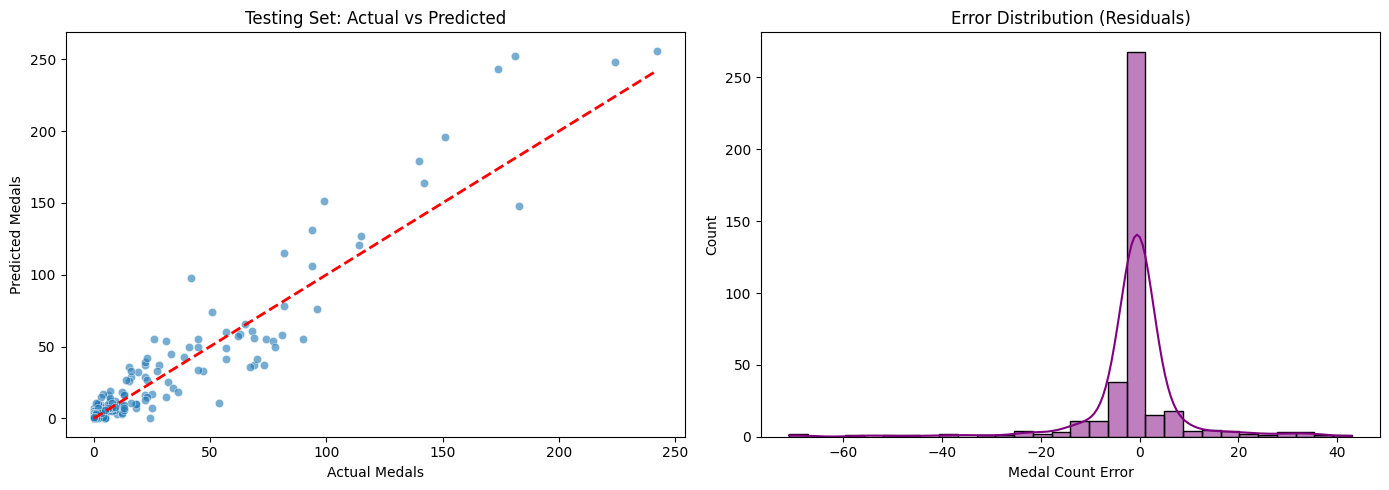

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Get predictions for both sets
y_train_pred = model.predict(X_train)
y_train_pred = np.maximum(y_train_pred, 0).round()

y_test_pred = model.predict(X_test)
y_test_pred = np.maximum(y_test_pred, 0).round()

# 2. Calculate Metrics
metrics = {
    "Train R2": r2_score(y_train, y_train_pred),
    "Test R2": r2_score(y_test, y_test_pred),
    "Train MAE": mean_absolute_error(y_train, y_train_pred),
    "Test MAE": mean_absolute_error(y_test, y_test_pred)
}

print(f"Training Accuracy: {metrics['Train R2']:.2%}")
print(f"Testing Accuracy: {metrics['Test R2']:.2%}")
print(f"Training Error (MAE): {metrics['Train MAE']:.2f}")
print(f"Testing Error (MAE): {metrics['Test MAE']:.2f}")

# 3. Plotting
plt.figure(figsize=(14, 5))

# Plot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.title('Testing Set: Actual vs Predicted')
plt.xlabel('Actual Medals')
plt.ylabel('Predicted Medals')

# Plot 2: Distribution of Errors (Residuals)
plt.subplot(1, 2, 2)
residuals = y_test - y_test_pred
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.title('Error Distribution (Residuals)')
plt.xlabel('Medal Count Error')

plt.tight_layout()
plt.show()

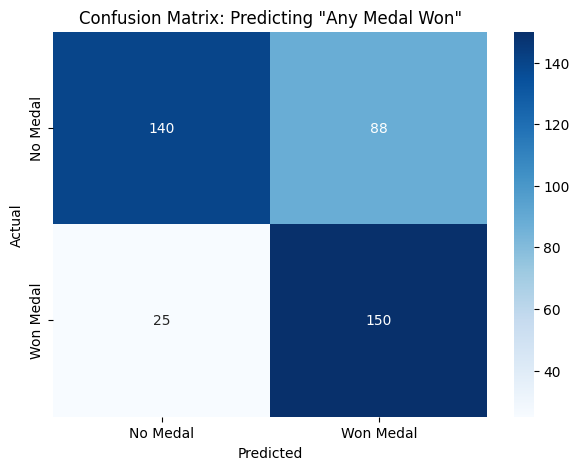

              precision    recall  f1-score   support

    No Medal       0.85      0.61      0.71       228
   Won Medal       0.63      0.86      0.73       175

    accuracy                           0.72       403
   macro avg       0.74      0.74      0.72       403
weighted avg       0.75      0.72      0.72       403



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# 1. Convert continuous predictions to binary (1 = Won Medal, 0 = No Medal)
y_test_binary = (y_test > 0).astype(int)
y_pred_binary = (predictions > 0).astype(int)

# 2. Generate Confusion Matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)

# 3. Plotting
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Medal', 'Won Medal'],
            yticklabels=['No Medal', 'Won Medal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Predicting "Any Medal Won"')
plt.show()

# 4. Print Classification Report
print(classification_report(y_test_binary, y_pred_binary, target_names=['No Medal', 'Won Medal']))
